In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load

## Temperature

In [129]:
temperature_df = pd.read_excel('../Datasets/TempFilter.xlsx')

In [130]:
temperature_df['Mean'] = (temperature_df['Maxima Media'] + temperature_df['Minima Media'])/2

In [131]:
mean = temperature_df.groupby(['Provincia', 'Año'])['Mean'].mean()

In [132]:
Temp_Mean = mean.reset_index()
Temp_Mean = Temp_Mean.rename(columns={'Provincia': 'State', 'Año': 'Year','Mean':'Temp_Mean'})
Temp_Mean

,State,Year,Temp_Mean
0,Camagüey,2006,26.025000
1,Camagüey,2007,25.950000
2,Camagüey,2008,25.933333
3,Camagüey,2009,25.566667
4,Camagüey,2010,25.308333
...,...,...,...
190,Villa Clara,2015,26.010000
191,Villa Clara,2016,25.360000
192,Villa Clara,2017,25.430000
193,Villa Clara,2018,25.340000


### Encode

In [133]:
States = Temp_Mean['State'].unique()
States

array(['Camagüey', 'Ciego de Ávila', 'Cienfuegos', 'Granma', 'Guantánamo',
       'Holguín', 'Isla de la Juventud', 'La Habana', 'Las Tunas',
       'Matanzas', 'Pinar del Río', 'Sancti Spíritus', 'Santiago de Cuba',
       'Villa Clara'], dtype=object)

In [134]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Temp_Mean['State_No'] = label_encoder.fit_transform(Temp_Mean['State'])
Temp_Mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   State      195 non-null    object 
 1   Year       195 non-null    int64  
 2   Temp_Mean  195 non-null    float64
 3   State_No   195 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 5.5+ KB


##### Dataset Insights

In [135]:
describe = pd.DataFrame(Temp_Mean['Temp_Mean'].describe())
describe.to_excel('../Datasets/Insigths/temp.xlsx')
describe

,Temp_Mean
count,195.000000
mean,25.525454
std,0.740907
min,22.150000
25%,25.114583
50%,25.566667
75%,25.987500
max,27.012500


### Multivariate Linear Regression

In [136]:
X = Temp_Mean[['State_No','Year']]
Y = Temp_Mean['Temp_Mean']

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)

In [138]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [139]:
y_test_pred = LR_model.predict(x_test)

In [140]:
mean_absolute_error(y_test, y_test_pred)

0.7039743170486944

In [141]:
mean_squared_error(y_test, y_test_pred)

0.9419467919216825

In [142]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_test_pred)

0.02927210538323952

In [143]:
# Save Model
dump(LR_model,'../Models/Weather/Temp_LR.joblib')

['../Models/Weather/Temp_LR.joblib']

## Rainfall

In [144]:
rainfall_df = pd.read_excel('../Datasets/RainfallFilter.xlsx')

In [145]:
rainfall_df.columns

Index(['Concepto', '  Anual', '  Enero', ' Febrero', '   Marzo', '  Abril',
       '   Mayo', '  Junio', '  Julio', '  Agosto', '  Septiembre',
       '  Octubre', '  Noviembre', '  Diciembre', 'Año'],
      dtype='object')

In [146]:
rainfall_df = rainfall_df[['Concepto', '  Anual', 'Año']]

In [147]:
rainfall_df['PRCP_Mean'] = round(rainfall_df['  Anual']/ 12, 2)

In [148]:
rainfall_df

,Concepto,Anual,Año,PRCP_Mean
0,Pinar del Río,1533.062150,2006,127.76
1,La Habana,1218.500059,2006,101.54
2,Ciudad de La Habana,1243.129165,2006,103.59
3,Matanzas,1150.310027,2006,95.86
4,Villa Clara,1204.984984,2006,100.42
...,...,...,...,...
231,Holguín,1237.361160,2020,103.11
232,Granma,1416.964153,2020,118.08
233,Santiago de Cuba,1284.387330,2020,107.03
234,Guantánamo,1398.669010,2020,116.56


In [149]:
mean = rainfall_df.groupby(['Concepto', 'Año'])['PRCP_Mean'].mean()
rainfall_df = mean.reset_index()
Rainfall_Mean = rainfall_df.sort_values(by='Año')
Rainfall_Mean= Rainfall_Mean.rename(columns={'Concepto': 'State', 'Año': 'Year','PRCP_Mean':'PRCP_Mean'})
Rainfall_Mean


,State,Year,PRCP_Mean
10,Camagüey,2006,114.29
22,Granma,2006,107.12
34,La Habana,2006,101.54
16,Cienfuegos,2006,94.83
25,Guantánamo,2006,154.33
...,...,...,...
64,Artemisa,2020,144.98
211,Sancti Spíritus,2020,126.52
187,Mayabeque,2020,129.91
223,Santiago de Cuba,2020,107.03


### Encode

In [150]:
States = Rainfall_Mean['State'].unique()
States

array(['  Camagüey', '  Granma', '  La Habana', '  Cienfuegos',
       '  Guantánamo', '  Ciego de Ávila', '  Pinar del Río',
       '  Ciudad de La Habana', '  Matanzas', '  Sancti Spíritus',
       '  Las Tunas', '  Santiago de Cuba', '  Isla de la Juventud',
       '  Villa Clara', '  Holguín', 'Guantánamo', 'Holguín',
       'Cienfuegos', 'Pinar del Río', 'Las Tunas', 'La Habana',
       'Ciego de Ávila', 'Matanzas', 'Camagüey', 'Isla de la Juventud',
       'Sancti Spíritus', 'Ciudad de La Habana', 'Villa Clara', 'Granma',
       'Santiago de Cuba', '    Artemisa', 'Mayabeque', '    Mayabeque',
       'Artemisa'], dtype=object)

In [151]:
# Function to Replace Blank Space
def Replace_Blank_Space():
    New_Serie = []
    for item in Rainfall_Mean['State']:
        
        if item[0:4]=='    ':
            item = item.replace('    ','',1)
            New_Serie.append(item)
        
        elif item[0:2]=='  ':
            item = item.replace('  ','',1)
            New_Serie.append(item)
        
        elif item[0]==' ':
            item = item.replace(' ','',1)
            New_Serie.append(item)
        else:
            New_Serie.append(item)
    Rainfall_Mean['States'] = New_Serie
Replace_Blank_Space()


In [152]:
States = Rainfall_Mean['States'].unique()
States

array(['Camagüey', 'Granma', 'La Habana', 'Cienfuegos', 'Guantánamo',
       'Ciego de Ávila', 'Pinar del Río', 'Ciudad de La Habana',
       'Matanzas', 'Sancti Spíritus', 'Las Tunas', 'Santiago de Cuba',
       'Isla de la Juventud', 'Villa Clara', 'Holguín', 'Artemisa',
       'Mayabeque'], dtype=object)

In [153]:
Rainfall_Mean = Rainfall_Mean[['States','Year','PRCP_Mean']]
Rainfall_Mean

,States,Year,PRCP_Mean
10,Camagüey,2006,114.29
22,Granma,2006,107.12
34,La Habana,2006,101.54
16,Cienfuegos,2006,94.83
25,Guantánamo,2006,154.33
...,...,...,...
64,Artemisa,2020,144.98
211,Sancti Spíritus,2020,126.52
187,Mayabeque,2020,129.91
223,Santiago de Cuba,2020,107.03


In [154]:
describe = pd.DataFrame(Rainfall_Mean['PRCP_Mean'].describe()).to_excel('../Datasets/Insigths/rain.xlsx')
describe

### Encode

In [155]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Rainfall_Mean['States_No'] = label_encoder.fit_transform(Rainfall_Mean['States'])
Rainfall_Mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 10 to 235
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   States     236 non-null    object 
 1   Year       236 non-null    int64  
 2   PRCP_Mean  236 non-null    float64
 3   States_No  236 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 8.3+ KB


In [156]:
States = Rainfall_Mean['States'].unique()
States

array(['Camagüey', 'Granma', 'La Habana', 'Cienfuegos', 'Guantánamo',
       'Ciego de Ávila', 'Pinar del Río', 'Ciudad de La Habana',
       'Matanzas', 'Sancti Spíritus', 'Las Tunas', 'Santiago de Cuba',
       'Isla de la Juventud', 'Villa Clara', 'Holguín', 'Artemisa',
       'Mayabeque'], dtype=object)

In [157]:
feature = ['States_No','Year']
target = ['PRCP_Mean']
X = Rainfall_Mean[feature]
Y = Rainfall_Mean[target]

### Multivariate Linear Regression

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, shuffle=False)

In [175]:
# Train & Test Size
print(len(x_train))
print(len((x_test)))

188
48


In [159]:
LR_model = LinearRegression()
LR_model.fit(x_train, y_train)

LinearRegression()

In [160]:
y_test_pred = LR_model.predict(x_test)
LR_MAE = mean_absolute_error(y_test, y_test_pred)
print(mean_absolute_error(y_test,y_test_pred))
print(mean_squared_error(y_test, y_test_pred))

15.876568064437494
468.3009097238221


In [161]:
# Save Model
dump(LR_model,'../Models/Weather/Rainfall_LR.joblib')

['../Models/Weather/Rainfall_LR.joblib']

### Support Vector Regression

In [162]:
from sklearn.svm import SVR
SVR_model = SVR(kernel='rbf')
SVR_model.fit(x_train,y_train)
y_test_pred = SVR_model.predict(x_test)
SVR_MAE = mean_absolute_error(y_test, y_test_pred)
mean_absolute_error(y_test, y_test_pred)

d:\Software Development\PythonLearning\Curso-Python\Virtual Enviroment\deeplearning\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15.681470605186233

In [163]:
mean_absolute_percentage_error(y_test,y_test_pred)

0.12287599821910046

In [164]:
mean_absolute_error(y_test, y_test_pred)

15.681470605186233

In [165]:
# Save Model
dump(SVR_model,'../Models/Weather/Rainfall_SVR.joblib')

['../Models/Weather/Rainfall_SVR.joblib']

### Gradient Boosting Regressor

In [166]:
from sklearn.ensemble import GradientBoostingRegressor
GBR_model = GradientBoostingRegressor()
GBR_model.fit(x_train, y_train)
y_test_pred = GBR_model.predict(x_test)
GBR_MAE = mean_absolute_error(y_test, y_test_pred)
mean_absolute_error(y_test,y_test_pred)

d:\Software Development\PythonLearning\Curso-Python\Virtual Enviroment\deeplearning\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


15.97569318939538

In [167]:
# Save Model
dump(GBR_model,'../Models/Weather/Rainfall_GBR.joblib')

['../Models/Weather/Rainfall_GBR.joblib']

In [168]:
# Rainfall Model Metrics
Models = ['LR', 'SVR','GBR']
MAE = [round(LR_MAE, 3), round(SVR_MAE, 3), round(GBR_MAE, 3)]

Models_Metrics = {
            'Model': Models,
            'MAE': MAE
}

Models_Metrics = pd.DataFrame(Models_Metrics)
Models_Metrics

,Model,MAE
0,LR,15.877
1,SVR,15.681
2,GBR,15.976


In [169]:
# Save Model Metrics
Models_Metrics.to_excel('../Models/Metrics/Rainfall_Models_Metrics.xlsx')

In [170]:
rainfall_df['PRCP_Mean'].mean()

112.99427966101696

### Rainfall Models Metrics Analysis

In [171]:
metric = pd.read_excel('../Models/Metrics/Rainfall_Models_Metrics.xlsx')
metric = metric[['Model', 'MAE']].sort_values(by='MAE')

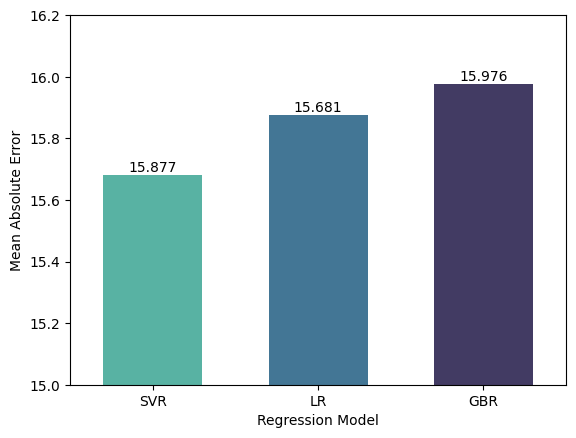

In [172]:
ax = sns.barplot(data=metric, x='Model', y='MAE', palette='mako_r', width=0.6 )
plt.ylabel('Mean Absolute Error')
plt.xlabel('Regression Model')
ax.set_ylim(15, 16.2)
for i, bar in enumerate(ax.patches):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        metric['MAE'][i],
        ha='center',
        va='bottom'
    )